In [70]:
import wfdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

%matplotlib inline





In [71]:
df= pd.read_csv('./DATA/pain_dataset_all_subjects.csv')

In [72]:
df.head()

,SpO2,HR,AccX,AccY,AccZ,Temp,EDA,Subject,Age,Gender,Height_cm,Weight_kg
0,96.999969,89.000763,0.760015,-0.869990,-0.100004,30.100043,0.083039,Subject1,30,M,177,94
1,96.999969,88.000137,0.750005,-0.869990,-0.110031,30.100043,0.081028,Subject1,30,M,177,94
2,96.999969,87.000443,0.750005,-0.869990,-0.110031,30.100043,0.083039,Subject1,30,M,177,94
3,96.999969,87.000443,0.750005,-0.879993,-0.100004,30.100043,0.083039,Subject1,30,M,177,94
4,96.999969,87.000443,0.760015,-0.859987,-0.100004,30.100043,0.081028,Subject1,30,M,177,94


In [73]:
# from ydata_profiling import ProfileReport

# profile = ProfileReport(df, title="Unsupervised EDA Report", explorative=True)
# profile.to_file("./EDA/ydata.html")  # or profile.to_file("eda_report.html")


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46109 entries, 0 to 46108
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SpO2       46109 non-null  float64
 1   HR         46109 non-null  float64
 2   AccX       46109 non-null  float64
 3   AccY       46109 non-null  float64
 4   AccZ       46109 non-null  float64
 5   Temp       46109 non-null  float64
 6   EDA        46109 non-null  float64
 7   Subject    46109 non-null  object 
 8   Age        46109 non-null  int64  
 9   Gender     46109 non-null  object 
 10  Height_cm  46109 non-null  int64  
 11  Weight_kg  46109 non-null  int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 4.2+ MB


In [75]:
df.isnull().sum()


SpO2         0
HR           0
AccX         0
AccY         0
AccZ         0
Temp         0
EDA          0
Subject      0
Age          0
Gender       0
Height_cm    0
Weight_kg    0
dtype: int64

In [76]:
df.shape

(46109, 12)

In [77]:
df['Gender'].unique()

array(['M', 'F'], dtype=object)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46109 entries, 0 to 46108
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SpO2       46109 non-null  float64
 1   HR         46109 non-null  float64
 2   AccX       46109 non-null  float64
 3   AccY       46109 non-null  float64
 4   AccZ       46109 non-null  float64
 5   Temp       46109 non-null  float64
 6   EDA        46109 non-null  float64
 7   Subject    46109 non-null  object 
 8   Age        46109 non-null  int64  
 9   Gender     46109 non-null  object 
 10  Height_cm  46109 non-null  int64  
 11  Weight_kg  46109 non-null  int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 4.2+ MB


In [79]:
df.head()

,SpO2,HR,AccX,AccY,AccZ,Temp,EDA,Subject,Age,Gender,Height_cm,Weight_kg
0,96.999969,89.000763,0.760015,-0.869990,-0.100004,30.100043,0.083039,Subject1,30,M,177,94
1,96.999969,88.000137,0.750005,-0.869990,-0.110031,30.100043,0.081028,Subject1,30,M,177,94
2,96.999969,87.000443,0.750005,-0.869990,-0.110031,30.100043,0.083039,Subject1,30,M,177,94
3,96.999969,87.000443,0.750005,-0.879993,-0.100004,30.100043,0.083039,Subject1,30,M,177,94
4,96.999969,87.000443,0.760015,-0.859987,-0.100004,30.100043,0.081028,Subject1,30,M,177,94


In [80]:
final_df=df.copy()

In [81]:
final_df.drop('Age',axis=1,inplace=True)

In [82]:
final_df.drop('Weight_kg',axis=1,inplace=True)


In [83]:
final_df.head()

,SpO2,HR,AccX,AccY,AccZ,Temp,EDA,Subject,Gender,Height_cm
0,96.999969,89.000763,0.760015,-0.869990,-0.100004,30.100043,0.083039,Subject1,M,177
1,96.999969,88.000137,0.750005,-0.869990,-0.110031,30.100043,0.081028,Subject1,M,177
2,96.999969,87.000443,0.750005,-0.869990,-0.110031,30.100043,0.083039,Subject1,M,177
3,96.999969,87.000443,0.750005,-0.879993,-0.100004,30.100043,0.083039,Subject1,M,177
4,96.999969,87.000443,0.760015,-0.859987,-0.100004,30.100043,0.081028,Subject1,M,177


In [84]:
final_df['Gender'] = final_df['Gender'].map({'M': 0, 'F': 1})
print(final_df['Gender'])


0        0
1        0
2        0
3        0
4        0
        ..
46104    1
46105    1
46106    1
46107    1
46108    1
Name: Gender, Length: 46109, dtype: int64


In [85]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46109 entries, 0 to 46108
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SpO2       46109 non-null  float64
 1   HR         46109 non-null  float64
 2   AccX       46109 non-null  float64
 3   AccY       46109 non-null  float64
 4   AccZ       46109 non-null  float64
 5   Temp       46109 non-null  float64
 6   EDA        46109 non-null  float64
 7   Subject    46109 non-null  object 
 8   Gender     46109 non-null  int64  
 9   Height_cm  46109 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 3.5+ MB


In [86]:
final_df['Subject'] = final_df['Subject'].str.extract(r'(\d+)').astype(int)


In [87]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46109 entries, 0 to 46108
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SpO2       46109 non-null  float64
 1   HR         46109 non-null  float64
 2   AccX       46109 non-null  float64
 3   AccY       46109 non-null  float64
 4   AccZ       46109 non-null  float64
 5   Temp       46109 non-null  float64
 6   EDA        46109 non-null  float64
 7   Subject    46109 non-null  int64  
 8   Gender     46109 non-null  int64  
 9   Height_cm  46109 non-null  int64  
dtypes: float64(7), int64(3)
memory usage: 3.5 MB


In [88]:
final_df.head()

,SpO2,HR,AccX,AccY,AccZ,Temp,EDA,Subject,Gender,Height_cm
0,96.999969,89.000763,0.760015,-0.869990,-0.100004,30.100043,0.083039,1,0,177
1,96.999969,88.000137,0.750005,-0.869990,-0.110031,30.100043,0.081028,1,0,177
2,96.999969,87.000443,0.750005,-0.869990,-0.110031,30.100043,0.083039,1,0,177
3,96.999969,87.000443,0.750005,-0.879993,-0.100004,30.100043,0.083039,1,0,177
4,96.999969,87.000443,0.760015,-0.859987,-0.100004,30.100043,0.081028,1,0,177


In [89]:
final_df.drop('Height_cm',axis=1,inplace=True)


In [90]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46109 entries, 0 to 46108
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SpO2     46109 non-null  float64
 1   HR       46109 non-null  float64
 2   AccX     46109 non-null  float64
 3   AccY     46109 non-null  float64
 4   AccZ     46109 non-null  float64
 5   Temp     46109 non-null  float64
 6   EDA      46109 non-null  float64
 7   Subject  46109 non-null  int64  
 8   Gender   46109 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 3.2 MB


In [91]:
final_df['Acc_magnitude'] = np.sqrt(df['AccX']**2 + df['AccY']**2 + df['AccZ']**2)


In [92]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46109 entries, 0 to 46108
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SpO2           46109 non-null  float64
 1   HR             46109 non-null  float64
 2   AccX           46109 non-null  float64
 3   AccY           46109 non-null  float64
 4   AccZ           46109 non-null  float64
 5   Temp           46109 non-null  float64
 6   EDA            46109 non-null  float64
 7   Subject        46109 non-null  int64  
 8   Gender         46109 non-null  int64  
 9   Acc_magnitude  46109 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 3.5 MB


In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(final_df[["EDA", "HR", "Temp", "SpO2", "Acc_magnitude"]])


In [94]:

df_scaled = pd.DataFrame(df_scaled, columns=["EDA", "HR", "Temp", "SpO2", "Acc_magnitude"])

In [95]:
print(df_scaled.head())

print(df_scaled.shape)

        EDA        HR      Temp      SpO2  Acc_magnitude
0 -0.782556  0.763480 -1.133523  0.622977       0.442151
1 -0.783503  0.698079 -1.133523  0.622977       0.385085
2 -0.782556  0.632740 -1.133523  0.622977       0.385085
3 -0.782556  0.632740 -1.133523  0.622977       0.452601
4 -0.783503  0.632740 -1.133523  0.622977       0.366186
(46109, 5)


In [138]:
# FEATURE EXTRACTION

#SETTING WINDOW SIZE

window_size=30

num_windows= len(df_scaled)//window_size
windows = [df_scaled.iloc[i*window_size:(i+1)*window_size] for i in range(num_windows)]




In [140]:
windows

[         EDA        HR      Temp      SpO2  Acc_magnitude
 0  -0.782556  0.763480 -1.133523  0.622977       0.442151
 1  -0.783503  0.698079 -1.133523  0.622977       0.385085
 2  -0.782556  0.632740 -1.133523  0.622977       0.385085
 3  -0.782556  0.632740 -1.133523  0.622977       0.452601
 4  -0.783503  0.632740 -1.133523  0.622977       0.366186
 5  -0.783503  0.632740 -1.133523  0.039345       0.375822
 6  -0.782556  0.567400 -1.133523  0.039345       0.461804
 7  -0.782556  0.502000 -1.133523  0.039345       0.375822
 8  -0.783503  0.502000 -1.133523  0.039345       0.387542
 9  -0.782556  0.305920 -1.133523  0.039345       0.387542
 10 -0.782556  0.305920 -1.133523  0.039345       0.400674
 11 -0.782556  0.240581 -1.133523  0.039345       0.400674
 12 -0.782556  0.240581 -1.133523  0.039345       0.465118
 13 -0.782556  0.240581 -0.945622  0.039345       0.356454
 14 -0.782556  0.305920 -1.133523  0.039345       0.239431
 15 -0.782556  0.371321 -1.133523  0.039345       0.0990

In [144]:
# Assuming windows is a list of DataFrames
feature_list = []

for window in windows:
    features = {}
    for col in window.columns:
        features[f'{col}_mean'] = window[col].mean()
        
    feature_list.append(features)

# Convert list of feature dictionaries to a DataFrame
features_df = pd.DataFrame(feature_list)
features_df.head()
features_df.shape

(1536, 5)

In [145]:
features_df.to_csv("windowed_features.csv", index=False)


In [97]:
# EXTRACTING FEATURES PER WINDOW

def extract_features(window):
    features={}

    for col in window.columns:
        values= window[col].values

        features[f'{col}_mean'] = np.mean(values)
        features[f'{col}_std'] = np.std(values)
        features[f'{col}_min'] = np.min(values)
        features[f'{col}_max'] = np.max(values)
        features[f'{col}_range'] = np.max(values) - np.min(values)
        features[f'{col}_slope'] = np.polyfit(np.arange(len(values)), values, 1)[0]  # Linear trend
        features[f'{col}_skew'] = skew(values)
        features[f'{col}_kurtosis'] = kurtosis(values)

    return features



feature_list=[]

for i in range(num_windows):
    start_idx= i*window_size
    end_idx= start_idx+window_size

    window= df_scaled.iloc[start_idx:end_idx]
    
    features= extract_features(window)
    features['window_id']=i
    feature_list.append(features)


df_features= pd.DataFrame(feature_list)


print(df_features.shape)

df_features.head()

df_features.to_csv('timeseries_windowed_features.csv', index=False)






    

C:\Users\sudee\AppData\Local\Temp\ipykernel_4764\759793702.py:15: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  features[f'{col}_skew'] = skew(values)
C:\Users\sudee\AppData\Local\Temp\ipykernel_4764\759793702.py:16: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  features[f'{col}_kurtosis'] = kurtosis(values)


(1536, 41)


In [98]:
df_features.head()

,EDA_mean,EDA_std,EDA_min,EDA_max,EDA_range,EDA_slope,EDA_skew,EDA_kurtosis,HR_mean,HR_std,...,SpO2_kurtosis,Acc_magnitude_mean,Acc_magnitude_std,Acc_magnitude_min,Acc_magnitude_max,Acc_magnitude_range,Acc_magnitude_slope,Acc_magnitude_skew,Acc_magnitude_kurtosis,window_id
0,-0.782714,0.000353,-0.783503,-0.782556,0.000946,1.452686e-05,-1.788854,1.200000,0.395262,0.157847,...,-1.927602,0.365992,0.068053,0.099089,0.465118,0.366029,-0.002320,-1.926402,5.741445,0
1,-0.782401,0.000423,-0.782556,-0.780682,0.001874,2.385641e-05,2.799991,7.202531,-0.073149,0.347246,...,-0.574350,0.349516,0.039549,0.264957,0.407226,0.142269,-0.000677,0.070946,-0.445743,1
2,-0.781311,0.000611,-0.782556,-0.780682,0.001874,3.354098e-05,-0.438438,-0.756694,-0.497982,0.157549,...,-0.628099,-0.384603,0.425076,-0.752792,0.604692,1.357484,-0.033356,1.275654,-0.140143,2
3,-0.780996,0.000561,-0.782556,-0.780682,0.001874,3.797871e-07,-1.591906,1.384903,-0.386874,0.212528,...,-1.927602,-0.536413,0.054382,-0.627335,-0.477726,0.149609,0.002426,-0.649699,-1.449276,3
4,-0.780714,0.000170,-0.781629,-0.780682,0.000946,-6.316025e-07,-5.199469,25.034483,-0.404306,0.170210,...,5.111111,-0.533821,0.051657,-0.603322,-0.472946,0.130376,0.001499,-0.383453,-1.769899,4


In [99]:
df= pd.read_csv('./DATA/timeseries_windowed_features.csv')

In [100]:
df.isnull().sum()

EDA_mean           0
EDA_std            0
EDA_min            0
EDA_max            0
EDA_range          0
EDA_slope          0
EDA_skew          16
EDA_kurtosis      16
HR_mean            0
HR_std             0
HR_min             0
HR_max             0
HR_range           0
HR_slope           0
HR_skew            8
HR_kurtosis        8
Temp_mean          0
Temp_std           0
Temp_min           0
Temp_max           0
Temp_range         0
Temp_slope         0
Temp_skew        164
Temp_kurtosis    164
SpO2_mean          0
SpO2_std           0
SpO2_min           0
SpO2_max           0
SpO2_range         0
SpO2_slope         0
SpO2_skew        235
SpO2_kurtosis    235
AccX_mean          0
AccX_std           0
AccX_min           0
AccX_max           0
AccX_range         0
AccX_slope         0
AccX_skew          4
AccX_kurtosis      4
AccY_mean          0
AccY_std           0
AccY_min           0
AccY_max           0
AccY_range         0
AccY_slope         0
AccY_skew         49
AccY_kurtosis

In [101]:
df = df.drop(columns=['SpO2_skew', 'SpO2_kurtosis', 'Temp_skew', 'Temp_kurtosis'])


In [102]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)


C:\Users\sudee\AppData\Local\Temp\ipykernel_4764\1133994342.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\sudee\AppData\Local\Temp\ipykernel_4764\1133994342.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [103]:
df.isnull().sum()

EDA_mean         0
EDA_std          0
EDA_min          0
EDA_max          0
EDA_range        0
EDA_slope        0
EDA_skew         0
EDA_kurtosis     0
HR_mean          0
HR_std           0
HR_min           0
HR_max           0
HR_range         0
HR_slope         0
HR_skew          0
HR_kurtosis      0
Temp_mean        0
Temp_std         0
Temp_min         0
Temp_max         0
Temp_range       0
Temp_slope       0
SpO2_mean        0
SpO2_std         0
SpO2_min         0
SpO2_max         0
SpO2_range       0
SpO2_slope       0
AccX_mean        0
AccX_std         0
AccX_min         0
AccX_max         0
AccX_range       0
AccX_slope       0
AccX_skew        0
AccX_kurtosis    0
AccY_mean        0
AccY_std         0
AccY_min         0
AccY_max         0
AccY_range       0
AccY_slope       0
AccY_skew        0
AccY_kurtosis    0
AccZ_mean        0
AccZ_std         0
AccZ_min         0
AccZ_max         0
AccZ_range       0
AccZ_slope       0
AccZ_skew        0
AccZ_kurtosis    0
window_id   

In [104]:
#SCALING THE FEATURES
df_filled = df.fillna(df.median(numeric_only=True))

scaler= StandardScaler()
scaled_features= scaler.fit_transform(df_filled.drop(columns=['window_id']))


In [105]:
scaled_features

array([[-7.84850647e-01, -4.11394791e-01, -7.57816539e-01, ...,
         4.66810123e-02,  7.37787226e-01,  2.04472332e-02],
       [-7.84536976e-01, -4.10292668e-01, -7.56841136e-01, ...,
        -2.52211161e-02, -4.88825344e-01, -1.96533649e-02],
       [-7.83444708e-01, -4.07352690e-01, -7.56841136e-01, ...,
        -1.32982336e-01,  1.29749294e+00,  8.59323737e-01],
       ...,
       [-5.92332011e-01, -4.01567953e-01, -5.60392008e-01, ...,
        -1.62118898e-02, -4.11304283e-01, -7.76793229e-01],
       [-6.10610561e-01, -1.17306773e-01, -6.30741780e-01, ...,
        -2.03646345e+00,  4.81263197e-01, -5.78556854e-01],
       [-6.04036508e-01, -2.72421348e-01, -5.90951185e-01, ...,
         3.82012842e+00,  6.37521002e-04, -8.29551235e-01]])

In [106]:
#DIMENSIONALITY REDUCTION

from sklearn.decomposition import PCA


        PC1       PC2
0 -1.246128  0.800201
1 -1.355865  0.625198
2 -0.310871 -1.860942
3 -1.742781 -1.057277
4 -1.803275 -1.680436
(1536, 2)


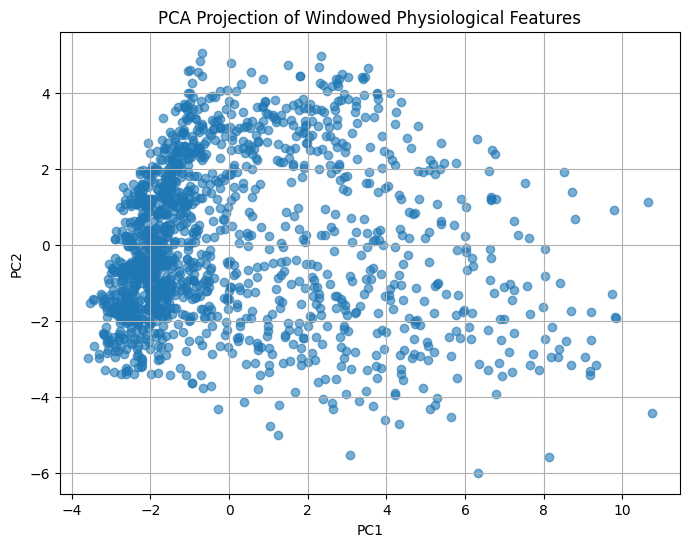

In [107]:
pca =PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

pca_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2'])

print(pca_df.head())
print(pca_df.shape)


plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.6)
plt.title("PCA Projection of Windowed Physiological Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


In [108]:
#CLUSTERING USING K-MEANS

from sklearn.cluster import KMeans

In [109]:
kmeans = KMeans(n_clusters=4, random_state=0)  # Try 2–5 clusters
kmeans_labels = kmeans.fit_predict(scaled_features)

pca_df['cluster'] = kmeans_labels





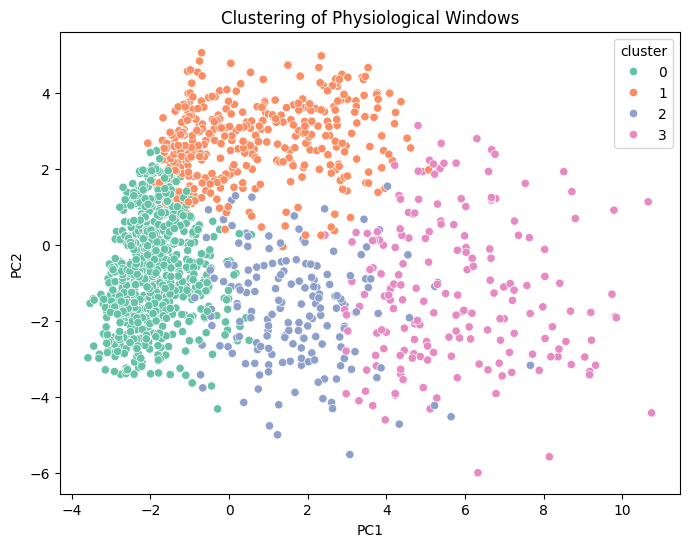

In [110]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='Set2')
plt.title("Clustering of Physiological Windows")
plt.show()

In [111]:
df_features.head()

,EDA_mean,EDA_std,EDA_min,EDA_max,EDA_range,EDA_slope,EDA_skew,EDA_kurtosis,HR_mean,HR_std,...,SpO2_kurtosis,Acc_magnitude_mean,Acc_magnitude_std,Acc_magnitude_min,Acc_magnitude_max,Acc_magnitude_range,Acc_magnitude_slope,Acc_magnitude_skew,Acc_magnitude_kurtosis,window_id
0,-0.782714,0.000353,-0.783503,-0.782556,0.000946,1.452686e-05,-1.788854,1.200000,0.395262,0.157847,...,-1.927602,0.365992,0.068053,0.099089,0.465118,0.366029,-0.002320,-1.926402,5.741445,0
1,-0.782401,0.000423,-0.782556,-0.780682,0.001874,2.385641e-05,2.799991,7.202531,-0.073149,0.347246,...,-0.574350,0.349516,0.039549,0.264957,0.407226,0.142269,-0.000677,0.070946,-0.445743,1
2,-0.781311,0.000611,-0.782556,-0.780682,0.001874,3.354098e-05,-0.438438,-0.756694,-0.497982,0.157549,...,-0.628099,-0.384603,0.425076,-0.752792,0.604692,1.357484,-0.033356,1.275654,-0.140143,2
3,-0.780996,0.000561,-0.782556,-0.780682,0.001874,3.797871e-07,-1.591906,1.384903,-0.386874,0.212528,...,-1.927602,-0.536413,0.054382,-0.627335,-0.477726,0.149609,0.002426,-0.649699,-1.449276,3
4,-0.780714,0.000170,-0.781629,-0.780682,0.000946,-6.316025e-07,-5.199469,25.034483,-0.404306,0.170210,...,5.111111,-0.533821,0.051657,-0.603322,-0.472946,0.130376,0.001499,-0.383453,-1.769899,4


In [112]:
df_features.isnull().sum()

EDA_mean                    0
EDA_std                     0
EDA_min                     0
EDA_max                     0
EDA_range                   0
EDA_slope                   0
EDA_skew                   16
EDA_kurtosis               16
HR_mean                     0
HR_std                      0
HR_min                      0
HR_max                      0
HR_range                    0
HR_slope                    0
HR_skew                     8
HR_kurtosis                 8
Temp_mean                   0
Temp_std                    0
Temp_min                    0
Temp_max                    0
Temp_range                  0
Temp_slope                  0
Temp_skew                 164
Temp_kurtosis             164
SpO2_mean                   0
SpO2_std                    0
SpO2_min                    0
SpO2_max                    0
SpO2_range                  0
SpO2_slope                  0
SpO2_skew                 235
SpO2_kurtosis             235
Acc_magnitude_mean          0
Acc_magnit

In [113]:
for col in df_features.columns:
    if df_features[col].isnull().sum() > 0:
        df_features[col].fillna(df_features[col].median(), inplace=True)


C:\Users\sudee\AppData\Local\Temp\ipykernel_4764\3888464412.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_features[col].fillna(df_features[col].median(), inplace=True)
C:\Users\sudee\AppData\Local\Temp\ipykernel_4764\3888464412.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [114]:
df_features['cluster'] = kmeans_labels
cluster_summary=df_features.groupby('cluster').mean()

In [115]:
df_features.isnull().sum()

EDA_mean                  0
EDA_std                   0
EDA_min                   0
EDA_max                   0
EDA_range                 0
EDA_slope                 0
EDA_skew                  0
EDA_kurtosis              0
HR_mean                   0
HR_std                    0
HR_min                    0
HR_max                    0
HR_range                  0
HR_slope                  0
HR_skew                   0
HR_kurtosis               0
Temp_mean                 0
Temp_std                  0
Temp_min                  0
Temp_max                  0
Temp_range                0
Temp_slope                0
Temp_skew                 0
Temp_kurtosis             0
SpO2_mean                 0
SpO2_std                  0
SpO2_min                  0
SpO2_max                  0
SpO2_range                0
SpO2_slope                0
SpO2_skew                 0
SpO2_kurtosis             0
Acc_magnitude_mean        0
Acc_magnitude_std         0
Acc_magnitude_min         0
Acc_magnitude_max   

In [116]:
df_features.describe()

,EDA_mean,EDA_std,EDA_min,EDA_max,EDA_range,EDA_slope,EDA_skew,EDA_kurtosis,HR_mean,HR_std,...,Acc_magnitude_mean,Acc_magnitude_std,Acc_magnitude_min,Acc_magnitude_max,Acc_magnitude_range,Acc_magnitude_slope,Acc_magnitude_skew,Acc_magnitude_kurtosis,window_id,cluster
count,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,...,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000
mean,0.000399,0.026657,-0.048257,0.048269,0.096526,-0.000016,0.016392,0.698499,0.000511,0.176327,...,0.000414,0.333353,-0.764007,0.845373,1.609380,-0.000090,-0.014540,2.766960,767.500000,0.837891
std,0.998111,0.063960,0.970532,1.028292,0.226342,0.005533,1.251547,4.280904,0.973400,0.149083,...,0.791827,0.511757,1.361956,1.774573,2.515596,0.023712,1.590687,5.366716,443.549321,1.039492
min,-0.814325,0.000000,-0.820690,-0.814105,0.000000,-0.101610,-5.199469,-2.000000,-1.765955,0.000000,...,-3.663605,0.005101,-7.179803,-2.780559,0.020666,-0.312344,-5.181054,-1.992545,0.000000,0.000000
25%,-0.700942,0.001604,-0.709274,-0.697384,0.005657,-0.001190,-0.335412,-1.172800,-0.772462,0.079768,...,-0.401043,0.042213,-1.602548,-0.041071,0.146107,-0.001443,-0.729517,-0.533918,383.750000,0.000000
50%,-0.442397,0.009274,-0.478314,-0.404894,0.032938,-0.000051,0.063717,-0.796659,-0.126528,0.131635,...,0.226956,0.058531,-0.446340,0.685812,0.265034,-0.000009,0.006459,0.627455,767.500000,0.000000
75%,0.334629,0.027141,0.235340,0.440048,0.096580,0.000231,0.469473,0.509064,0.594062,0.217128,...,0.619630,0.468855,0.440574,0.989356,2.272058,0.001761,0.688234,3.730213,1151.250000,1.000000
max,3.418976,1.189760,3.418976,3.482951,3.577955,0.050130,5.199469,25.034483,3.305916,1.058396,...,3.684133,3.755685,0.820849,18.648718,21.086830,0.285927,5.169535,24.909159,1535.000000,3.000000


In [117]:
# Round and transpose for better readability
display(cluster_summary.round(2).T)


cluster,0,1,2,3
EDA_mean,0.10,-0.30,0.26,-0.04
EDA_std,0.01,0.02,0.06,0.06
EDA_min,0.08,-0.33,0.13,-0.15
EDA_max,0.13,-0.25,0.34,0.06
EDA_range,0.05,0.08,0.21,0.21
EDA_slope,-0.00,0.00,-0.00,0.00
EDA_skew,0.02,0.06,0.10,-0.19
EDA_kurtosis,0.33,-0.08,2.93,1.81
HR_mean,-0.55,0.98,-0.17,0.45
HR_std,0.13,0.20,0.26,0.28


In [118]:
df_features.isnull().sum()

EDA_mean                  0
EDA_std                   0
EDA_min                   0
EDA_max                   0
EDA_range                 0
EDA_slope                 0
EDA_skew                  0
EDA_kurtosis              0
HR_mean                   0
HR_std                    0
HR_min                    0
HR_max                    0
HR_range                  0
HR_slope                  0
HR_skew                   0
HR_kurtosis               0
Temp_mean                 0
Temp_std                  0
Temp_min                  0
Temp_max                  0
Temp_range                0
Temp_slope                0
Temp_skew                 0
Temp_kurtosis             0
SpO2_mean                 0
SpO2_std                  0
SpO2_min                  0
SpO2_max                  0
SpO2_range                0
SpO2_slope                0
SpO2_skew                 0
SpO2_kurtosis             0
Acc_magnitude_mean        0
Acc_magnitude_std         0
Acc_magnitude_min         0
Acc_magnitude_max   

In [119]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics import pairwise_distances_argmin_min
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd

# Assuming your data is in `df_features` and your cluster labels in `df_features['cluster']`
# Remove non-feature columns if any (like 'window_id', 'cluster', etc.)
feature_cols = [col for col in df_features.columns if col not in ['cluster', 'window_id', 'stress_state']]
X = df_features[feature_cols]
labels = df_features['cluster']

# 1. Silhouette Score (higher is better; range -1 to 1)
sil_score = silhouette_score(X, labels)
print("Silhouette Score:", sil_score)

# 2. Davies-Bouldin Index (lower is better)
db_score = davies_bouldin_score(X, labels)
print("Davies-Bouldin Index:", db_score)

# 3. Intra-cluster distance (within-cluster compactness)
kmeans_centroids = df_features.groupby('cluster')[feature_cols].mean().values
intra_dists = []
for i in range(4):  # for each cluster
    cluster_points = X[labels == i]
    centroid = kmeans_centroids[i]
    dists = np.linalg.norm(cluster_points - centroid, axis=1)
    intra_dists.append(np.mean(dists))
print("Intra-cluster distances (lower is better):", intra_dists)

# 4. Inter-cluster distances (between centroids; higher is better)
inter_dists = cdist(kmeans_centroids, kmeans_centroids)
print("Inter-cluster distance matrix:")
print(pd.DataFrame(inter_dists))


Silhouette Score: 0.011733749521141248
Davies-Bouldin Index: 5.459756252642103
Intra-cluster distances (lower is better): [np.float64(11.428142256891856), np.float64(11.664247545124963), np.float64(15.262439545503799), np.float64(13.070362478971177)]
Inter-cluster distance matrix:
          0         1         2         3
0  0.000000  3.730254  7.802767  8.067520
1  3.730254  0.000000  7.889109  6.442060
2  7.802767  7.889109  0.000000  5.991357
3  8.067520  6.442060  5.991357  0.000000


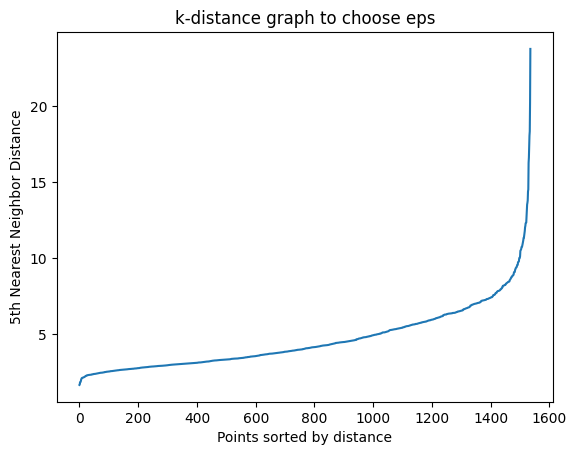

In [120]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(scaled_features)
distances, indices = neighbors_fit.kneighbors(scaled_features)
distances = np.sort(distances[:, 4])  # 4 = min_samples - 1

plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel('5th Nearest Neighbor Distance')
plt.title('k-distance graph to choose eps')
plt.show()


In [121]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np

# 1. Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['window_id']))  # exclude non-feature columns

# 2. Apply DBSCAN
dbscan = DBSCAN(eps=5.4, min_samples=5)  # start with default values
dbscan_labels = dbscan.fit_predict(scaled_features)

# 3. Evaluate
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print("Estimated clusters:", n_clusters)
print("Noise points:", n_noise)

# Silhouette score (excluding noise points)
if n_clusters > 1:
    score = silhouette_score(scaled_features[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
    print("Silhouette Score:", score)
else:
    print("Silhouette Score: Not meaningful with one or zero clusters.")


Estimated clusters: 3
Noise points: 337
Silhouette Score: 0.1515911568047109


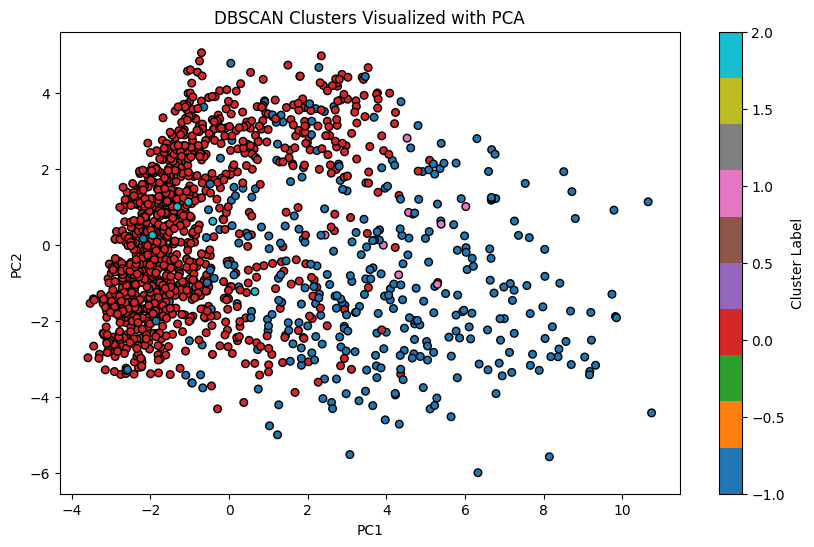

In [122]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)  # Use the same scaled features used in DBSCAN

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=dbscan.labels_, cmap='tab10', s=30, edgecolor='k')
plt.title("DBSCAN Clusters Visualized with PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Cluster Label')
plt.show()


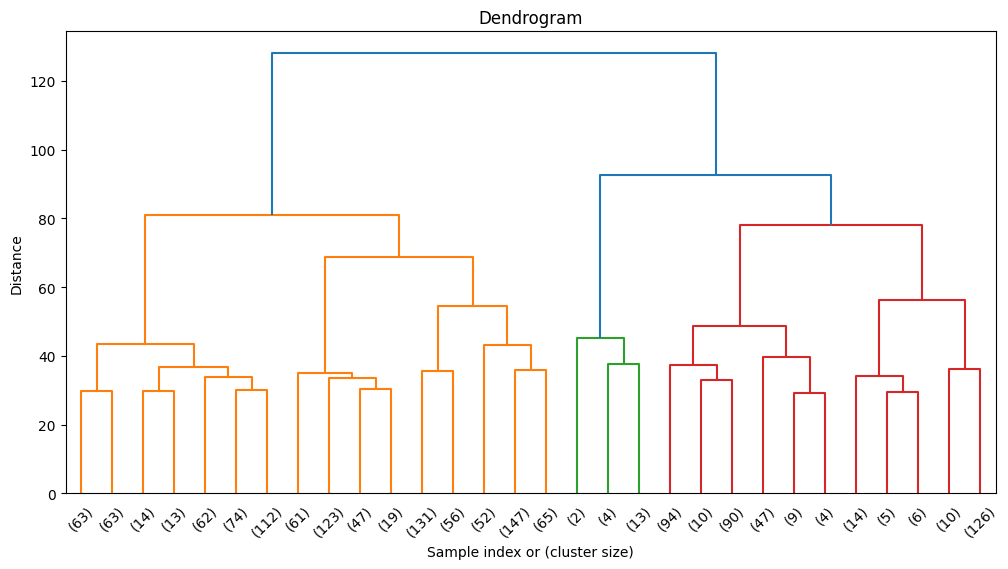

In [123]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Use scaled data
Z = linkage(scaled_features, method='ward')  # or 'average', 'complete'
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='lastp', p=30)
plt.title("Dendrogram")
plt.xlabel("Sample index or (cluster size)")
plt.ylabel("Distance")
plt.show()


In [124]:
labels = fcluster(Z, t=4, criterion='maxclust')  # exactly 4 clusters


In [125]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

print("Silhouette:", silhouette_score(scaled_features, labels))
print("DB Index:", davies_bouldin_score(scaled_features, labels))


Silhouette: 0.050942419158915085
DB Index: 2.4049039617779364


In [126]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # keep 95% of variance
pca_features = pca.fit_transform(scaled_features)
print(f"Reduced to {pca.n_components_} dimensions")


Reduced to 27 dimensions


In [127]:
kmeans = KMeans(n_clusters=4, random_state=0)
labels = kmeans.fit_predict(pca_features)


In [128]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

print("Silhouette:", silhouette_score(pca_features, labels))
print("Davies-Bouldin:", davies_bouldin_score(pca_features, labels))


Silhouette: 0.11285705469484937
Davies-Bouldin: 2.1298394970786103


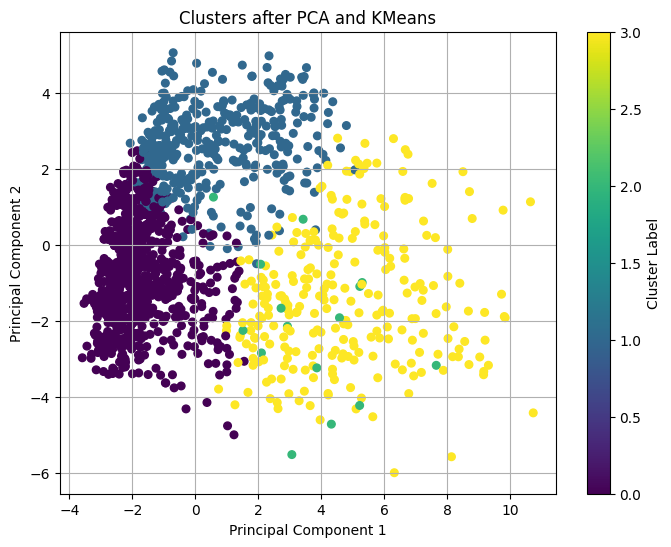

In [129]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_features[:, 0], pca_features[:, 1], c=labels, cmap='viridis', s=30)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters after PCA and KMeans')
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.show()


In [130]:
! pip install antropy


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [131]:
def count_peaks(signal):
    peaks, _ = find_peaks(signal)
    return len(peaks)

def entropy(signal):
    return ant.sample_entropy(signal)

def top_fft_features(signal, n=3):
    fft_vals = np.abs(fft(signal))[:len(signal)//2]
    top_n = np.sort(fft_vals)[-n:]
    return top_n


In [132]:
final_df.drop(columns=['AccX', 'AccY', 'AccZ'], inplace=True)

In [133]:
final_df.head()

,SpO2,HR,Temp,EDA,Subject,Gender,Acc_magnitude
0,96.999969,89.000763,30.100043,0.083039,1,0,1.159528
1,96.999969,88.000137,30.100043,0.081028,1,0,1.153905
2,96.999969,87.000443,30.100043,0.083039,1,0,1.153905
3,96.999969,87.000443,30.100043,0.083039,1,0,1.160558
4,96.999969,87.000443,30.100043,0.081028,1,0,1.152042


In [134]:
from scipy.signal import find_peaks

def count_peaks(signal):
    peaks, _ = find_peaks(signal, distance=5)  # Adjust distance as needed
    return len(peaks)


In [135]:
from scipy.stats import entropy

def signal_entropy(signal, bins=20):
    hist, _ = np.histogram(signal, bins=bins, density=True)
    return entropy(hist + 1e-10)  # Avoid log(0)


In [136]:
def top_fft_features(signal, n=3):
    fft_vals = np.abs(np.fft.rfft(signal))
    fft_freqs = np.fft.rfftfreq(len(signal), d=1/4)  # Assuming 4 Hz sampling
    sorted_indices = np.argsort(fft_vals)[-n:]
    return fft_freqs[sorted_indices]


In [137]:
# New start

In [69]:
final_df.head()

,SpO2,HR,Temp,EDA,Subject,Gender,Acc_magnitude
0,96.999969,89.000763,30.100043,0.083039,1,0,1.159528
1,96.999969,88.000137,30.100043,0.081028,1,0,1.153905
2,96.999969,87.000443,30.100043,0.083039,1,0,1.153905
3,96.999969,87.000443,30.100043,0.083039,1,0,1.160558
4,96.999969,87.000443,30.100043,0.081028,1,0,1.152042
